In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [105]:
dummy=pd.get_dummies(df.Kyphosis,drop_first=True)
dummy=dummy.rename(columns={'present':'kyphosis'})
df.drop(['Kyphosis'],axis=1,inplace=True)
newdf=pd.concat([df,dummy],axis=1)

<AxesSubplot:xlabel='kyphosis', ylabel='count'>

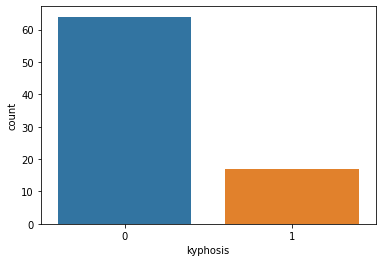

In [106]:
sns.countplot(x='kyphosis',data=newdf)

In [107]:
newdf.head()

,Age,Number,Start,kyphosis
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


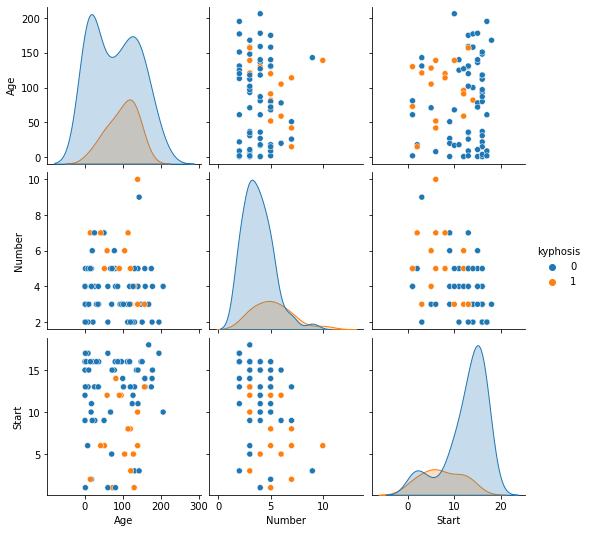

In [108]:
sns.pairplot(newdf,hue='kyphosis')

In [109]:
newdf.head()

,Age,Number,Start,kyphosis
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


In [110]:
X=newdf.drop('kyphosis',axis=1)
y=newdf['kyphosis']

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier().fit(X_train,y_train)

In [113]:
pred=dtree.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[17  3]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25

0.76


In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rfc=RandomForestClassifier(n_estimators=200).fit(X_train,y_train)
pred1=rfc.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
print(accuracy_score(y_test,pred1))

[[19  1]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25

0.84
